In [9]:
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
from torchvision import models, transforms, datasets
from PIL import Image


In [10]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
print(DEVICE)

cuda


00:



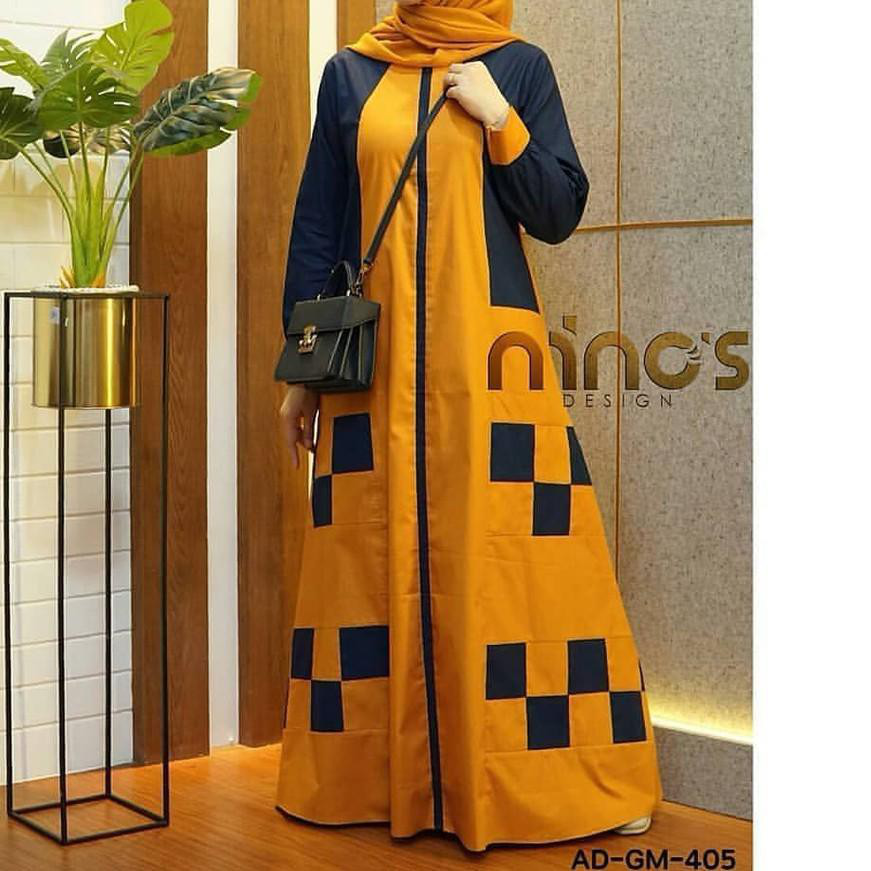

In [12]:

class ImageFolderWithPaths(datasets.ImageFolder):
 
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path


print('00:\n')
Image.open('train/train/00/00b32bd5ba9cdd7c2f11e3975b3e54fa.jpg')

In [14]:
#preprocess images
transforms_ = transforms.Compose([
    transforms.Resize(size=[224, 224], interpolation=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

dataset = ImageFolderWithPaths('train/train/', transforms_) # our custom dataset

#define dataloader
BATCH = 1
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH)

In [15]:
import torchvision.models as models

resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)

In [16]:



def pooling_output(x):
    #write your code here
  for layer_name, layer in alexnet._modules.items():
    #layer_name = layer_name.cuda()
    layer = layer.cuda()
    x = layer(x)
    if layer_name == 'avgpool':
        break
    #print(x.shape)
  return x.view(BATCH,-1)


In [18]:


vec_img_list = []



with torch.no_grad():
    alexnet.eval()
    for item, (inputs, labels, paths) in enumerate(dataloader):
        print("Batch {}/{}".format(item,len(dataloader)), end='\r')
        inputs = inputs.to(DEVICE)
        
        img_vec = pooling_output(inputs)#write your code here
        vec_img_list += [(img_vec.cpu(), paths[0])]
        torch.cuda.empty_cache()


In [13]:


#query image
query_image = 'test/test/0a7cebae9c84961ea176d6083101f03e.jpg'
img = Image.open(query_image)

#transform the query img to vector and reshape it
input_tensor = transforms_(img)

input_tensor = input_tensor.view(1, *input_tensor.shape)



#obtain query_vector 
with torch.no_grad():
  input_tensor  = input_tensor.cuda()
  print(input_tensor.shape)
  query_vector = pooling_output(input_tensor)
  query_vector = query_vector.cpu()

NameError: name 'transforms_' is not defined

Time taken to retrieve:  2.563328981399536  seconds


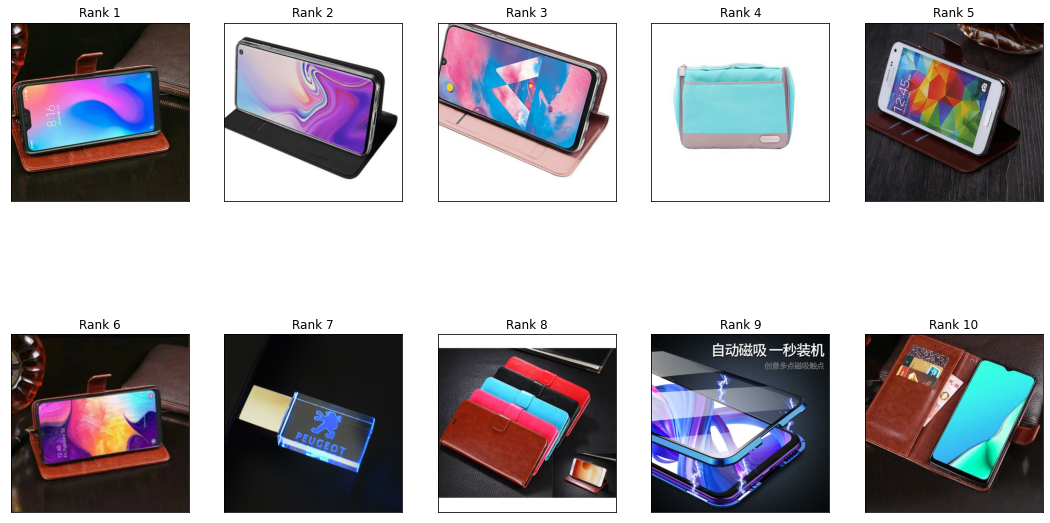

In [20]:
import time
import matplotlib.pyplot as plt

#query image
query_image = 'test/test/0a7cebae9c84961ea176d6083101f03e.jpg'
start_time = time.time()
img = Image.open(query_image)

#transform the query img to vector and reshape it
input_tensor = transforms_(img)

input_tensor = input_tensor.view(1, *input_tensor.shape)



#obtain query_vector 
with torch.no_grad():
  input_tensor  = input_tensor.cuda()
  #print("Shape of input : ", input_tensor.shape)
  query_vector = pooling_output(input_tensor)
  query_vector = query_vector.cpu()
#reshape the query
query_vector = query_vector.reshape(1, 9216)


cos = nn.CosineSimilarity(dim=1, eps=1e-6)

#find top 10 images in the data that match query image.
N = 10
cosine_scores_list = []
cosine_scores = {}

for i in range(len(vec_img_list)):
  temp_cos_score = cos(query_vector, vec_img_list[i][0])
  temp_cos_score = temp_cos_score.item()
  
  cosine_scores[temp_cos_score] = vec_img_list[i][1]
  #store in a list to sort 
  cosine_scores_list.append(temp_cos_score)


cosine_scores_list.sort(reverse= True)

top_N_similarity_scores = cosine_scores_list[:N:]
img_path_list = []
#retrieve the image path using the highest N similarity scores
for i in top_N_similarity_scores:

  img_path = cosine_scores[i]
  img_path_list.append(img_path)

fig, chungus = plt.subplots(2,5)
fig.set_size_inches(18.5, 10.5)
axes = [ax for axes in chungus for ax in axes]

for i in range(len(img_path_list)):
    axes[i].imshow(plt.imread(img_path_list[i]))
    axes[i].set_yticks([])
    axes[i].set_xticks([])
    axes[i].set_title(f'Rank {i+1}')

print('Time taken to retrieve: ', time.time()-start_time, ' seconds')

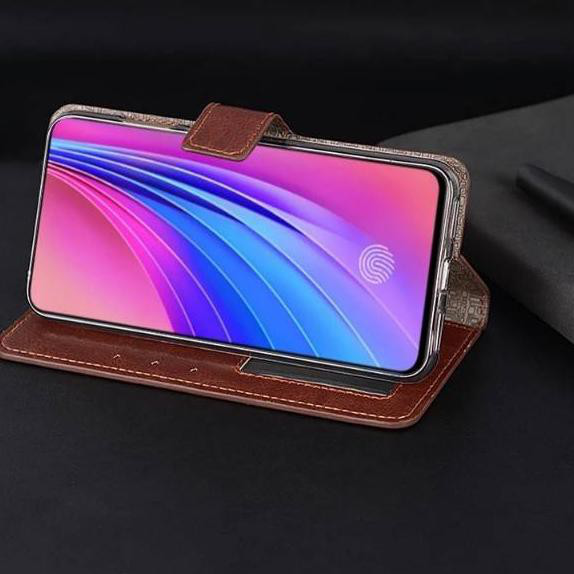

In [8]:
#query image
query_image = 'test/test/0a7cebae9c84961ea176d6083101f03e.jpg'
Image.open('test/test/0a7cebae9c84961ea176d6083101f03e.jpg')


In [16]:
#reshape the query
query_vector = query_vector.reshape(1,9216) 

In [17]:

cos = nn.CosineSimilarity(dim=1, eps=1e-6)

#find top N images in the data that match query image.
N = 10
cosine_scores_list = []
cosine_scores = {}
#write you code here
for i in range(len(vec_img_list)):
  temp_cos_score = cos(query_vector, vec_img_list[i][0])
  temp_cos_score = temp_cos_score.item()
  
  cosine_scores[temp_cos_score] = vec_img_list[i][1]
  #store in a list to sort 
  cosine_scores_list.append(temp_cos_score)


cosine_scores_list.sort(reverse= True)

top_N_similarity_scores = cosine_scores_list[:N:]
img_path_list = []
#retrieve the image path using the highest N similarity scores
for i in top_N_similarity_scores:

  img_path = cosine_scores[i]
  print(img_path)

 

train/train/10/b19544d39b44b37874837669a285d34e.jpg
train/train/10/d16506e8fd0a56aa31d407a15bb4f670.jpg
train/train/10/4f6449ed12319e584e9a70ec4aac4ba5.jpg
train/train/09/6eceb28b696e5e892c6c1dd1f8731dd9.jpg
train/train/10/bf2794ecc5f8f55c55fcbb929afcdbff.jpg
train/train/10/ff4e92da89dcc19f9e15828f3d04974a.jpg
train/train/19/dc9310866fb9b7e6a827767335fdd032.jpg
train/train/10/0a3659bdb2f24d11977173fb2ac53b60.jpg
train/train/10/53c6c2d8c89fa1414f72388b61e1924e.jpg
train/train/10/e3f3d2b797791a35218e50ef093b96fd.jpg


Top N most similar images are ...


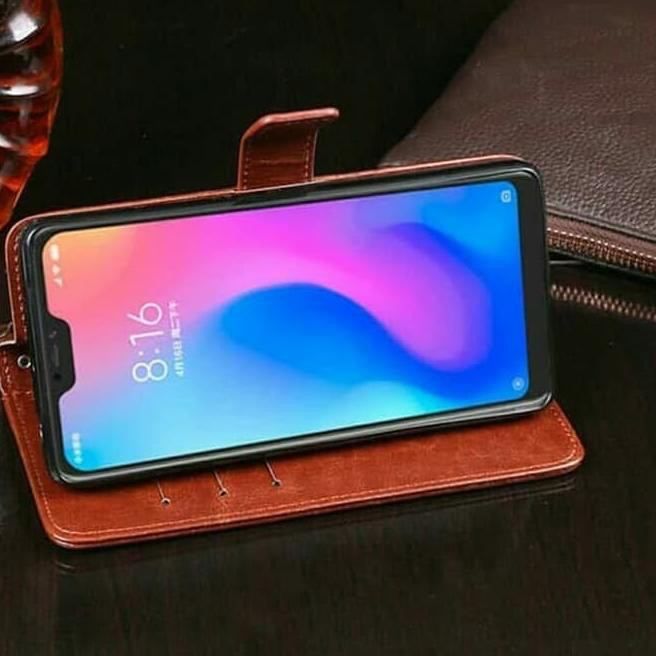

In [18]:

print("Top N most similar images are ...")
x0 = cosine_scores[cosine_scores_list[0]]
Image.open(x0)



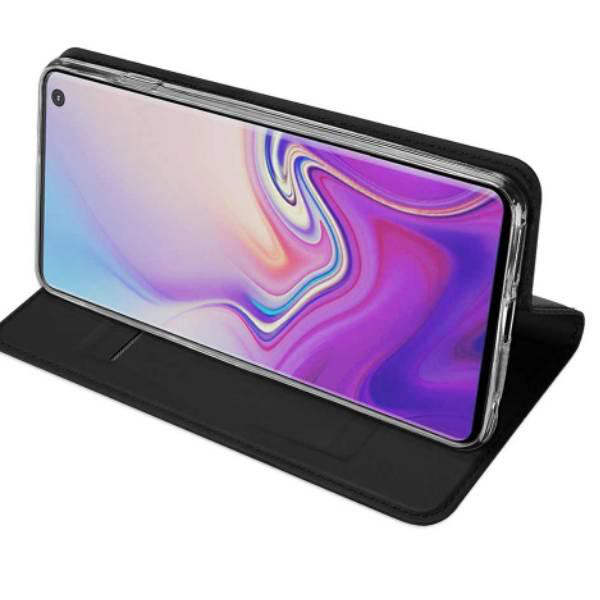

In [19]:
x1 = cosine_scores[cosine_scores_list[1]]
Image.open(x1)

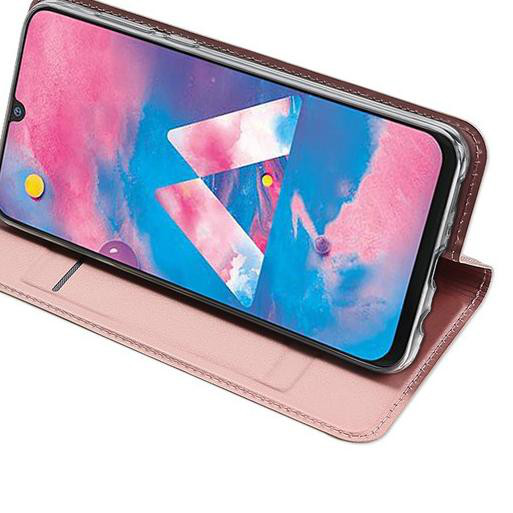

In [20]:
x2 = cosine_scores[cosine_scores_list[2]]
Image.open(x2)

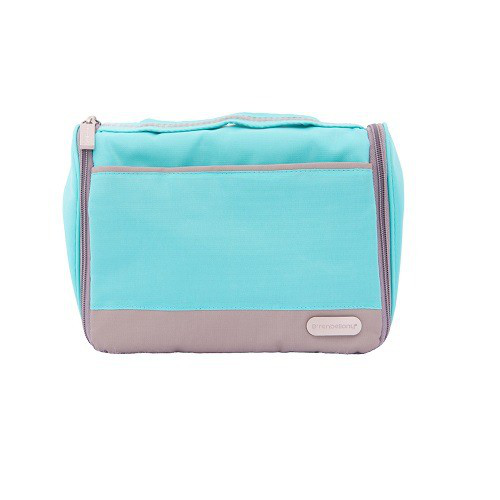

In [21]:
x3 = cosine_scores[cosine_scores_list[3]]
Image.open(x3)

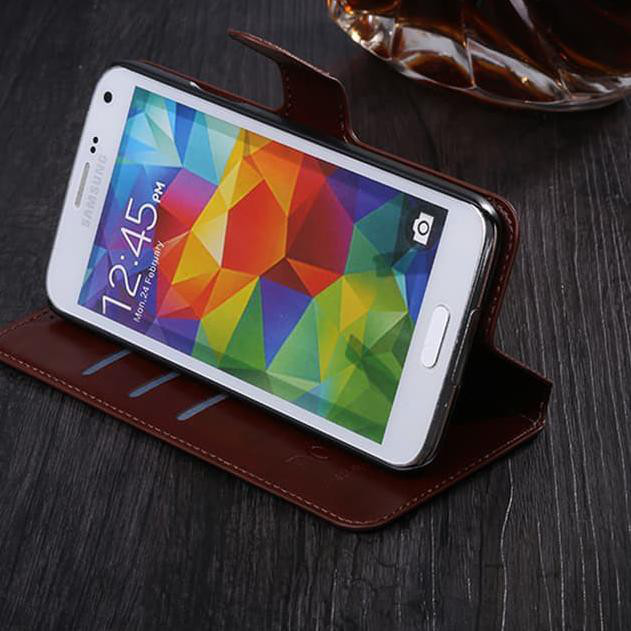

In [22]:
x4 = cosine_scores[cosine_scores_list[4]]
Image.open(x4)

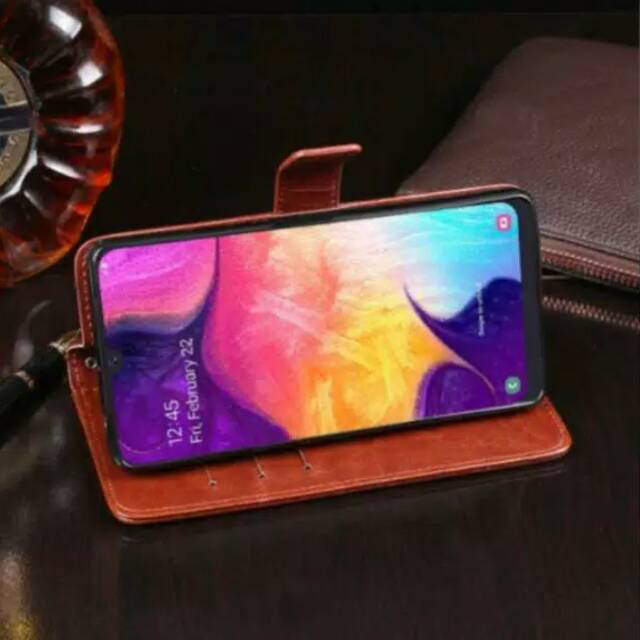

In [23]:
x5 = cosine_scores[cosine_scores_list[5]]
Image.open(x5)

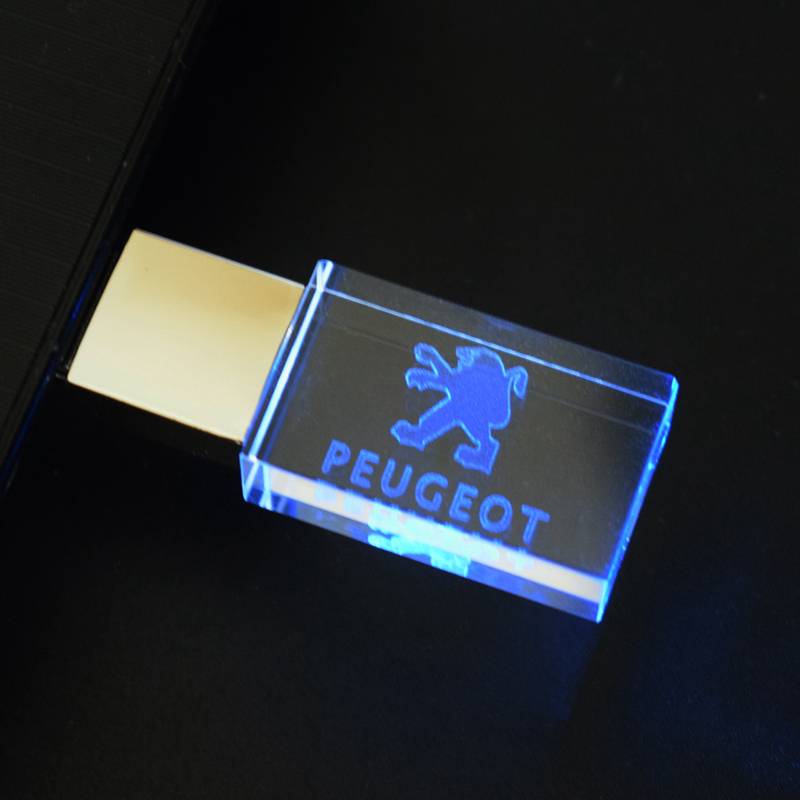

In [24]:
x6 = cosine_scores[cosine_scores_list[6]]
Image.open(x6)

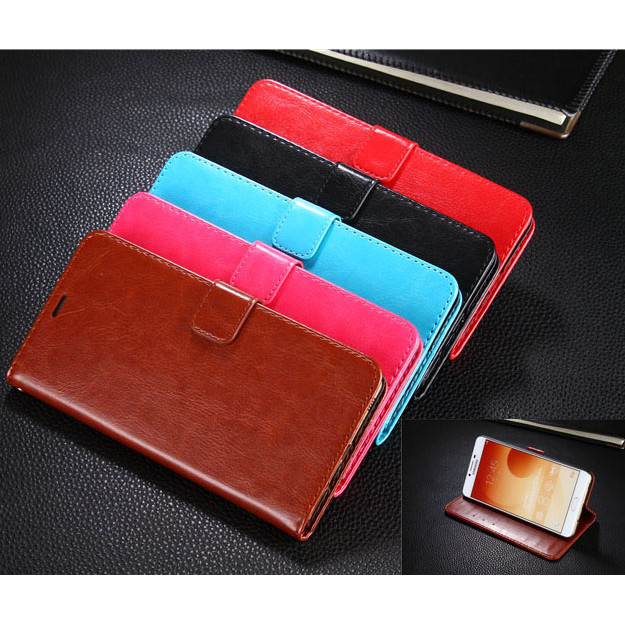

In [25]:
x7 = cosine_scores[cosine_scores_list[7]]
Image.open(x7)

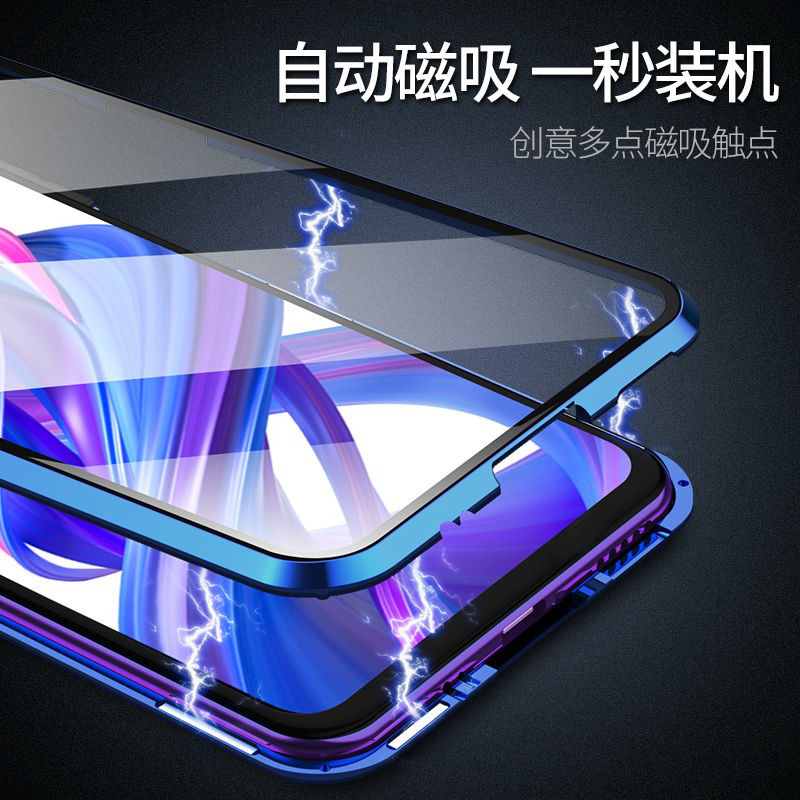

In [26]:
x8 = cosine_scores[cosine_scores_list[8]]
Image.open(x8)

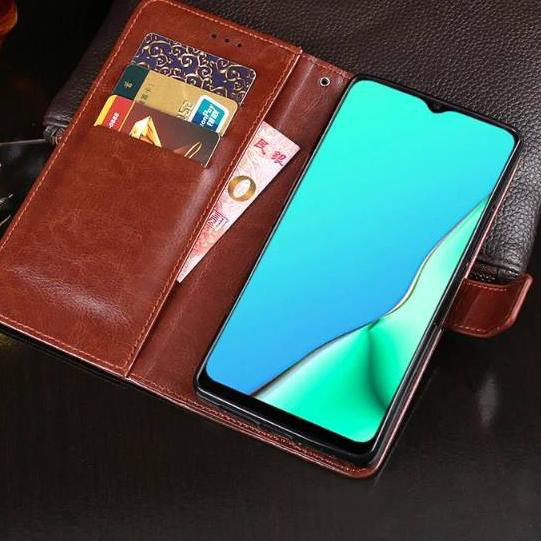

In [27]:
x9 = cosine_scores[cosine_scores_list[9]]
Image.open(x9)